In [13]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import modgp
import GPflow


In [14]:
def logistic(x):
    return 1./(1+ np.exp(-x))

In [15]:

X = np.linspace(0, 1, 2000).reshape(-1, 1)
k1 = GPflow.kernels.Matern12(input_dim=1, lengthscales=0.01)
k2 = GPflow.kernels.Matern52(input_dim=1, lengthscales=0.1, variance=10)

In [16]:

K1 = k1.compute_K_symm(X)
K2 = k2.compute_K_symm(X)

In [17]:
noise_var = 0.001
np.random.seed(1)
f = np.random.multivariate_normal(np.zeros(X.shape[0]), K1).reshape(-1, 1)
g = np.random.multivariate_normal(np.zeros(X.shape[0]), K2).reshape(-1, 1)
mean = f * logistic(g)
y = mean + np.random.randn(*mean.shape) * np.sqrt(noise_var)

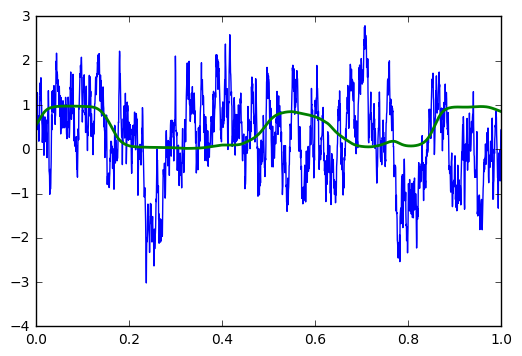

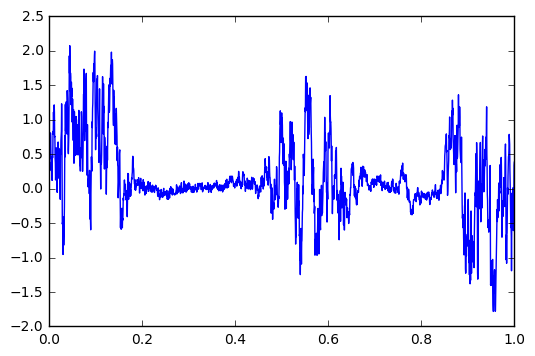

In [18]:
plt.plot(X, f, 'b')
plt.plot(X, logistic(g), 'g', lw=2)
plt.figure()
plt.plot(X, y, 'b')

In [19]:
m = modgp.ModGP(X, y, k1, k2, X[::8].copy())

In [20]:
m.kern1.fixed = True
m.kern2.fixed = True
m.likelihood.noise_var = noise_var
m.likelihood.noise_var.fixed = True

In [21]:
m.optimize(disp=1)

Caught KeyboardInterrupt, setting                   model with most recent state.


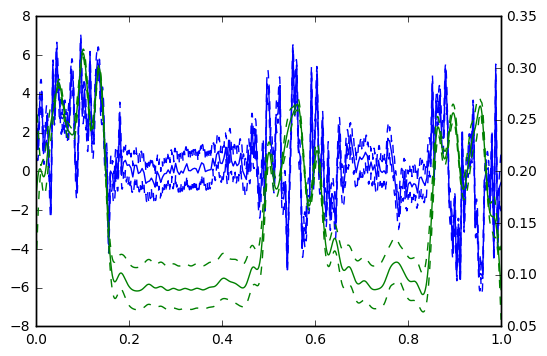

In [22]:
mu, var = m.predict_f(X)
plt.plot(X, mu, 'b')
plt.plot(X, mu + 2*np.sqrt(var), 'b--')
plt.plot(X, mu - 2*np.sqrt(var), 'b--')

plt.twinx()
mu, var = m.predict_g(X)
plt.plot(X, logistic(mu), 'g')
plt.plot(X, logistic(mu + 2*np.sqrt(var)), 'g--')
plt.plot(X, logistic(mu - 2*np.sqrt(var)), 'g--')

#plt.plot(X, y*2, 'kx')